<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Visualizacio%CC%81n_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means visual

El objetivo de este notebook es visualizar el algoritmo k-means de manera visual.

* Tipo de clasificación de grupos.

* Dificultades en la creación de grupos.

* Dificultad de atípicos.






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
def distancia_euclidiana(x1,x2):
  """
  Calcula la distancia euclidiana entre dos individuos.
  """
  return np.sqrt(np.sum((x1-x2)**2))
def plot_interaccion(datos,info_clusters, show=[]   ):
  k=len(info_clusters.keys())
  columnas= datos.columns
  n=datos.shape[0]
  centros_cluster =np.zeros( (k,2) )
  colores_=[]
  for i in range(1,k+1):
    centros_cluster[ i-1, : ] = info_clusters[i]["center"]
    colores_.append( info_clusters[i]["Color"] )
    info_clusters[i]["Unidades"]=[]
    info_clusters[i]["Ventas"]= []
  for individuo in range(n):
      dist = []
      valores_individuo = datos.loc[individuo, :]
      fig, ax = plt.subplots(figsize=(4, 4))
      sns.scatterplot(data= datos, x=columnas[0], y=columnas[1],color='black' )
      sns.scatterplot( x=centros_cluster[:, 0], y=centros_cluster[:, 1] ,color= colores_, marker = '^', s= 100)
      for cluster in range(1,k+1):
        centro = info_clusters[cluster]["center"]
        unidades= info_clusters[cluster]["Unidades"]
        ventas= info_clusters[cluster]["Ventas"]
        sns.scatterplot(x= unidades, y=ventas , color=info_clusters[cluster]["Color"])
        centro = info_clusters[cluster]["center"]
        sns.lineplot(x=[valores_individuo[ columnas[0]], centro[0]],
                     y=[valores_individuo[columnas[1]], centro[1]],
                     color="black", ax=ax)
        dis = distancia_euclidiana(valores_individuo, centro  )
        dist.append(dis)
      if show ==[] or individuo in show:
        display(fig)
        clear_output(wait=True)
      cluster_optimo = np.argmin(dist)
      centro = info_clusters[cluster_optimo+1]["center"]
      info_clusters[cluster_optimo+1]['Unidades'].append(valores_individuo[columnas[0]] )
      info_clusters[cluster_optimo+1]['Ventas'].append(valores_individuo[columnas[1]] )

      sns.lineplot( x = [valores_individuo[columnas[0]], centro[0]  ]  ,
                   y = [valores_individuo[columnas[1]], centro[1]  ], color="blue" )
      if show ==[] or individuo in show:
        display(fig)
        clear_output(wait=True)
      plt.close(fig)
  # plt.close(fig)

  for i in range(1,k+1):
    unidades_mean= np.array(info_clusters[i]["Unidades"]).mean()
    ventas_mean= np.array(info_clusters[i]["Ventas"]).mean()
    info_clusters[i]["center"] = np.array([unidades_mean,ventas_mean  ] )
    centros_cluster[ i-1, : ] = info_clusters[i]["center"]

  fig, ax = plt.subplots(figsize=(4, 4))
  sns.scatterplot(data= datos, x=columnas[0], y=columnas[1],color='black' )
  sns.scatterplot( x=centros_cluster[:, 0], y=centros_cluster[:, 1] ,color= colores_, marker = '^', s= 100)

  for cluster in range(1,k+1):
      centro = info_clusters[cluster]["center"]
      unidades= info_clusters[cluster]["Unidades"]
      ventas= info_clusters[cluster]["Ventas"]
        # if len(unidades) != 0:
      sns.scatterplot(x= unidades, y=ventas , color=info_clusters[cluster]["Color"])
  plt.show()
  return info_clusters
def plot_inicio(datos_,info_clusters_ ):
  k=len(info_clusters_.keys())
  fig = plt.figure(0)
  columnas=datos_.columns
  sns.scatterplot(data= datos_, x=columnas[0], y=columnas[1],color='black')
  for cluster in range(1,k+1):
    centro = info_clusters_[cluster]["center"]
    sns.scatterplot(x= [centro[0]], y=[centro[1]] ,marker = '^',s= 100)
  plt.show()
def info_null(datos_, k,colores  ):
  info_clusters_ = {}
  columnas = datos_.columns
  for i in range(1,k+1):
    np.random.seed(i)
    centro_unidades = np.random.uniform(datos_[columnas[0]].min() ,datos_[columnas[0]].max() )
    centros_ventas = np.random.uniform(datos_[columnas[1]].min() ,datos_[columnas[1]].max() )
    cluster_i = {
        'center': np.array( [centro_unidades,centros_ventas  ] ),
        'Unidades': [],
        'Ventas':[],
        'Color': colores[i-1]
    }
    info_clusters_[i ] =cluster_i
  return info_clusters_

In [ ]:
# Muestra 1
mu=(200,400)
sigma= [[2000,1],[1,1700]]
m= np.random.multivariate_normal( mu, sigma,15)
# Muestra 2
mu1=(700,300)
sigma1= [[1200,-500],[-500,2000]]
m1= np.random.multivariate_normal( mu1, sigma1, 15)
# Muestra 3
mu2=(400,200)
sigma2= [[1200,750],[750,7050]]
m2= np.random.multivariate_normal( mu2, sigma2, 15)
datos  = np.concatenate ((m, m1, m2))
datos =pd.DataFrame( {"Unidades":datos[:,0] , "Ventas en miles":datos[:,1] } )#.sample(75).reset_index(drop=True)
datos_escala = datos[["Unidades"]].copy()
datos_escala["Ventas"] = datos["Ventas en miles"]*1000


mu2=(400,200)
sigma2= [[1200,750],[750,7050]]
m2= np.random.multivariate_normal( mu2, sigma2, 100)
c2=np.mean(m2,axis=0)
datos_sin_cluster = pd.DataFrame({"Unidades":m2[:,0],
                                  "Ventas":m2[:,1]  } )


# Fijar una semilla aleatoria para reproducibilidad
np.random.seed(42)

# Generar una matriz de covarianza positiva definida

cov = np.array([[1, -0.9], [-0.9, 1]])
grupo_1 = np.random.multivariate_normal(mean=[10, 3], cov=cov, size=50)
cov = np.array([[1, 0], [0, 1]])
grupo_2 = np.random.multivariate_normal(mean=[15, 5], cov=cov, size=50)
cov = np.array([[1, 0.8], [0.8, 1]])
grupo_3 = np.random.multivariate_normal(mean=[10, 10], cov=cov, size=50)
# Generar algunos registros atípicos aleatoriamente

# Concatenar todos los datos en un solo arreglo
datos_clientes = pd.DataFrame(np.concatenate((grupo_1, grupo_2, grupo_3), axis=0),
                     columns = ["Promociones", "Clientes"])

datos_clientes.loc[len(datos_clientes),:] = [18,25]


In [ ]:
# plt.scatter(y=datos_clientes["Clientes"], x=datos_clientes["Promociones"])

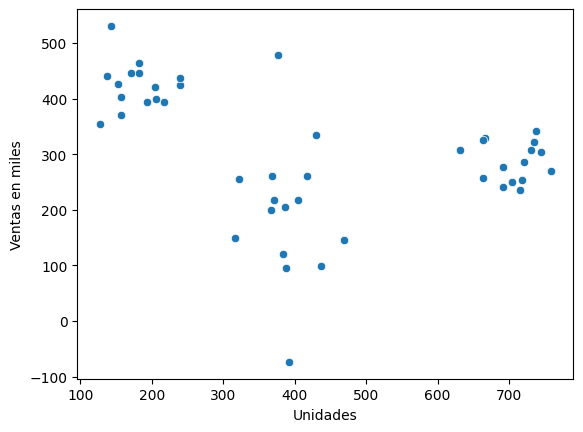

In [ ]:
fig = plt.figure(0)
sns.scatterplot(data= datos, x="Unidades", y="Ventas en miles")
plt.show()

In [ ]:
info_clusters = info_null(datos, 3,['#9600FD', '#7FFF1B','#FF8645' ] )

# Datos ideales

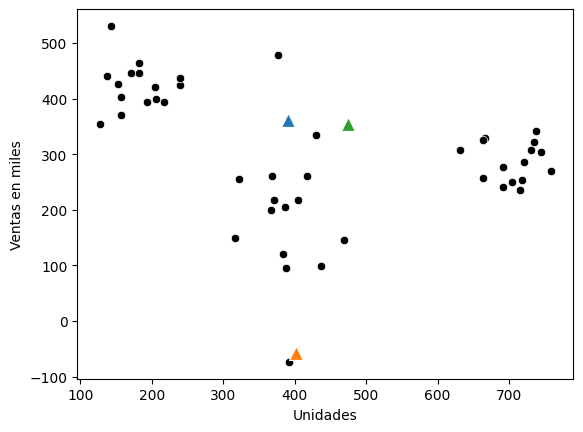

In [ ]:
plot_inicio(datos, info_clusters)

Primera iteración

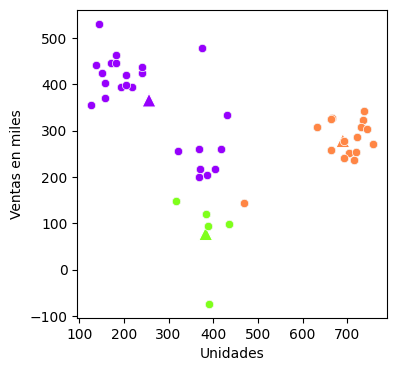

In [ ]:
info_clusters =plot_interaccion(datos, info_clusters=info_clusters )

Segunda iteración

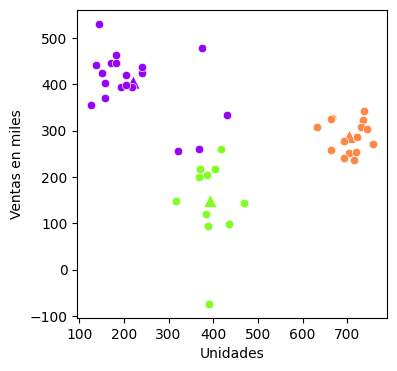

In [ ]:
info_clusters =plot_interaccion(datos, info_clusters=info_clusters,show=[0,1,2,3,4,5,50,60,70] )

Tercer iteración

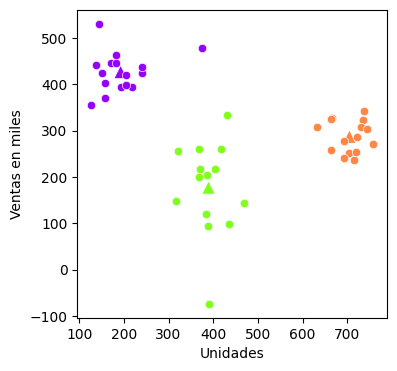

In [ ]:
info_clusters =plot_interaccion(datos, info_clusters=info_clusters ,show=[0,1,2,3,4,5,50,60,70])

# Problemas de escalamiento

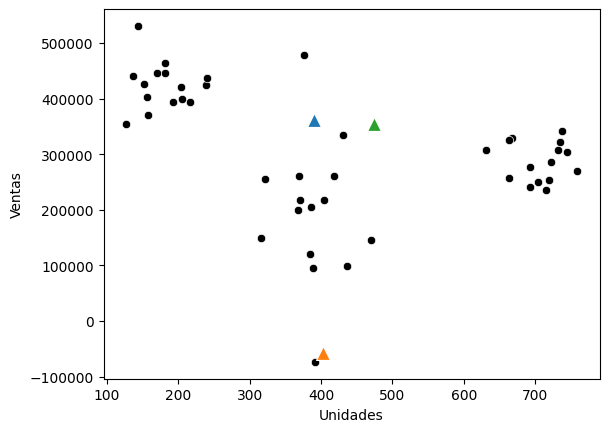

In [ ]:
info_clusters_escala = info_null(datos_escala, 3,['#9600FD', '#7FFF1B','#FF8645' ])
plot_inicio(datos_escala, info_clusters_escala)

Primera iteración

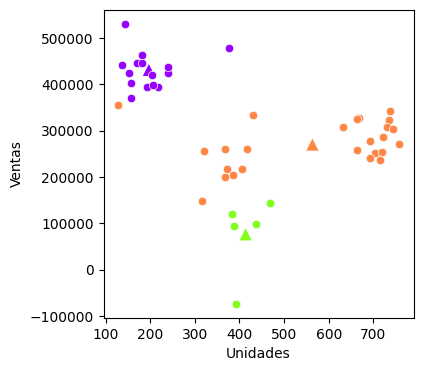

In [ ]:
info_clusters =plot_interaccion(datos_escala, info_clusters=info_clusters_escala )

Segunda iteración

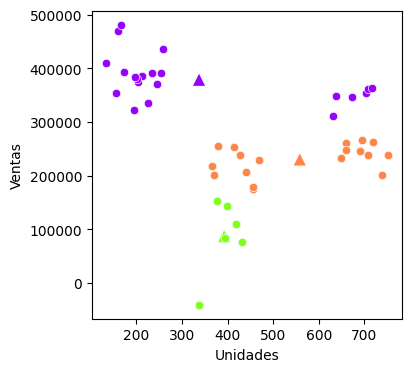

In [ ]:
info_clusters =plot_interaccion(datos_escala, info_clusters=info_clusters_escala,show=[0,1,2,3,4,5,50,60,70] )

Tercera iteración

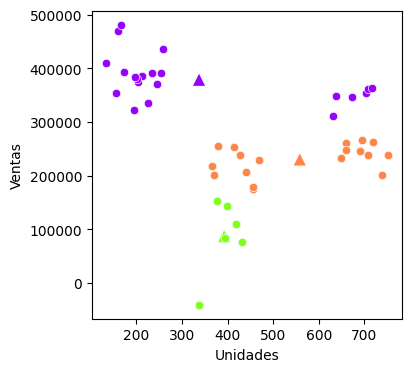

In [ ]:
info_clusters =plot_interaccion(datos_escala, info_clusters=info_clusters_escala,show=[0,1,2,3,4,5,50,60,70] )

En este problema se observa que hay una división principalmente por la variable ventas, donde divide los grupos por nivel de ventas, pero no se tuvo en consideración las unidades vendidas y que existe un patrón relevante entre estas dos variables.


Por lo anterior se recomienda estandarizar las variables, esto con el objetivo de que cada variable tenga la misma escala. Es decir, las ventas estan en una escala de 5 digitos, mientras que las unidades de 2 digitos, esto sucede por el calculo de las distancias.


$$
\text{Distancia}=  \sqrt{ (\text{Ventas}_1 -\text{Ventas}_2 )^2 +( \text{Unidades}_1 -  \text{Unidades}_2 )^2 }
$$

El problema se debe a que  la diferencia de dos individuos por las ventas $(\text{Ventas}_1 -\text{Ventas}_2)$ es de mayor escala que la diferencia por las unidades $(\text{Unidades}_1 -  \text{Unidades}_2)$

# Estandarización de variables

Para este tipo de problemas debemos llevar las dos variables a una misma escala ¿cómo podemos hacer esto? realizando una transformación de las variables para que ambas se encuentren en un rango similar. Con la variable ventas hallamos el promedio $\bar{\text{Ventas}}$ y la desviación estandar $S_{\text{Ventas}}$, de manera similar para las unidades. promedio $\bar{\text{Unidades}}$ y la desviación estandar $S_{\text{Unidades}}$  




In [ ]:
datos_escala.describe()

,Unidades,Ventas
count,45.000000,45.000000
mean,433.135507,281061.347588
std,205.579943,111520.086557
min,133.505206,-40472.484452
25%,234.414859,217254.972736
50%,415.021155,263118.555622
75%,658.634066,370755.343852
max,751.339326,481365.537680


In [ ]:
promedio_unidades = datos_escala["Unidades"].mean()
desviacion_unidades = datos_escala["Unidades"].std()
promedio_ventas = datos_escala["Ventas"].mean()
desviacion_ventas = datos_escala["Ventas"].std()
print("Variables |", "Promedio","         |", "Desviación estandar" )
print("Unidades: |",promedio_unidades,"|", desviacion_unidades )
print("Ventas:   |",promedio_ventas,"|", desviacion_ventas )

Variables | Promedio          | Desviación estandar
Unidades: | 424.6881027178621 | 221.1699037846163
Ventas:   | 302832.5319498272 | 121022.26457643541


Posteriormente realizamos una transformación a lo que llamaremos una estandarización de variables:

$$
\text{Ventas}_{estandar} = \frac{\text{Ventas}- \bar{\text{Ventas}} }{S_{\text{Ventas}}}
$$

$$
\text{Unidades}_{estandar} = \frac{\text{Unidades}- \bar{\text{Unidades}} }{S_{\text{Unidades}}}
$$



In [ ]:
datos_estandar = datos_escala.copy()
datos_estandar["Unidades"]= ((datos_estandar["Unidades"]-
                             promedio_unidades)/desviacion_unidades )
datos_estandar["Ventas"]= ((datos_estandar["Ventas"]-
                             promedio_ventas)/desviacion_ventas )
datos_estandar.describe().round( 5)

,Unidades,Ventas
count,45.00000,45.00000
mean,-0.00000,0.00000
std,1.00000,1.00000
min,-1.34548,-3.10879
25%,-0.99159,-0.50576
50%,-0.17572,0.03637
75%,1.09465,0.79558
max,1.50846,1.88370


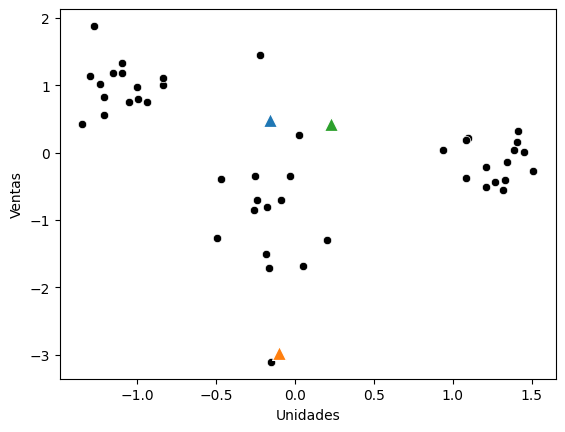

In [ ]:
info_clusters_estandar = info_null(datos_estandar, 3,['#9600FD', '#7FFF1B','#FF8645' ])
plot_inicio(datos_estandar, info_clusters_estandar)

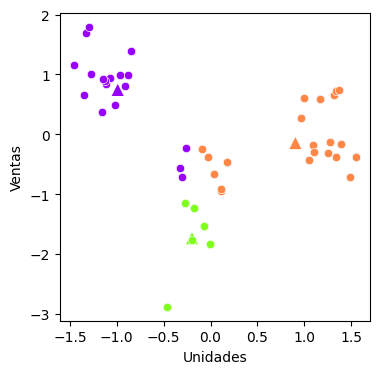

In [ ]:

info_clusters =plot_interaccion(datos_estandar, info_clusters_estandar )

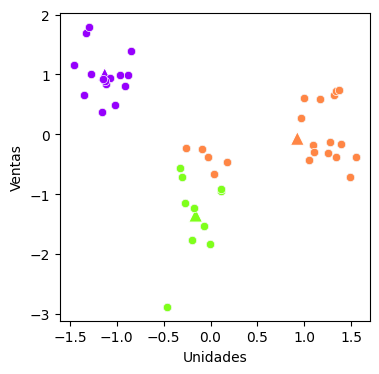

In [ ]:

info_clusters =plot_interaccion(datos_estandar, info_clusters_estandar )

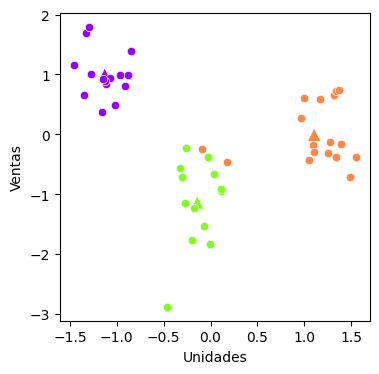

In [ ]:
info_clusters =plot_interaccion(datos_estandar, info_clusters_estandar,show=[0,1,2,3,4,5,50,60,70] )

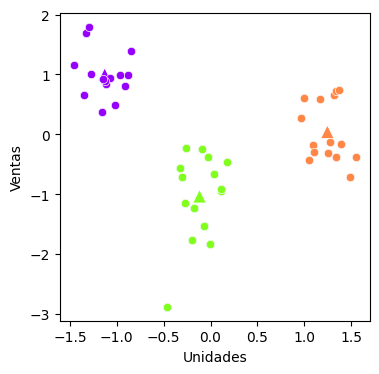

In [ ]:
info_clusters =plot_interaccion(datos_estandar, info_clusters_estandar,show=[0,1,2,3,4,5,50,60,70] )

# Datos con atípicos



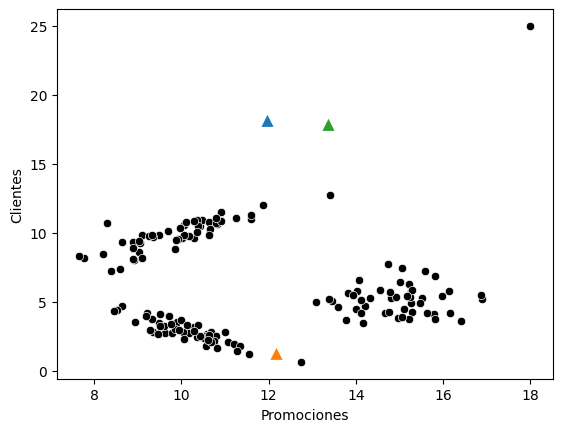

In [ ]:
info_clusters_estandar = info_null(datos_clientes, 3,['#9600FD', '#7FFF1B','#FF8645' ])
plot_inicio(datos_clientes, info_clusters_estandar)

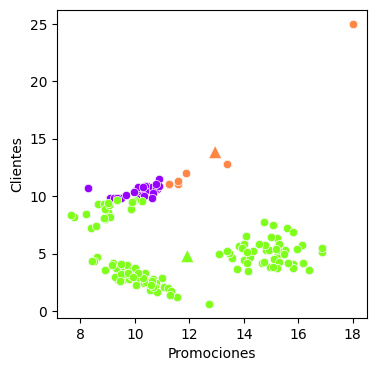

In [ ]:
info_clusters =plot_interaccion(datos_clientes, info_clusters_estandar,
                                show=[ *list(range(10)),
                                      *list(range(30,50) )] )

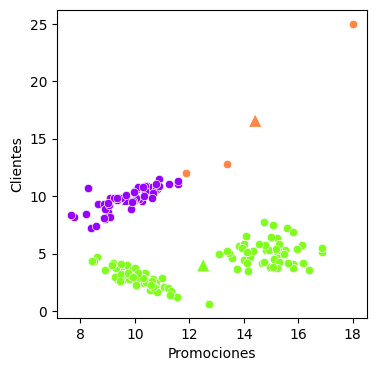

In [ ]:
info_clusters =plot_interaccion(datos_clientes, info_clusters_estandar,show=[ *list(range(10)),
                                      *list(range(30,50) )] )

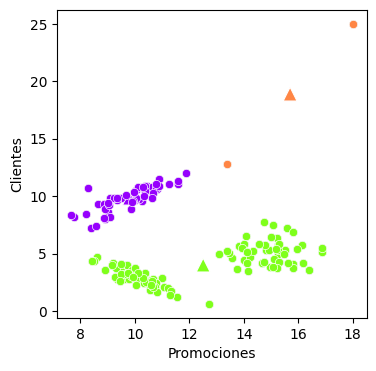

In [ ]:
info_clusters =plot_interaccion(datos_clientes, info_clusters_estandar,show=[ *list(range(10)),
                                      *list(range(40,50)),
                                      *list(range(70,80))] )

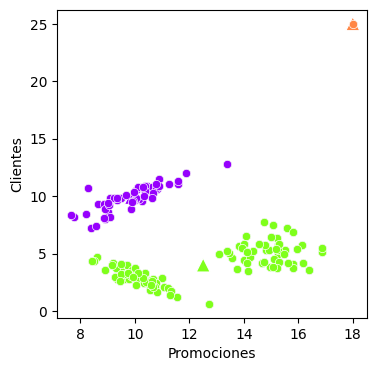

In [ ]:
info_clusters =plot_interaccion(datos_clientes, info_clusters_estandar,show=[ *list(range(10)),
                                      *list(range(40,50)),
                                      *list(range(70,80))] )

# Datos sin cluster

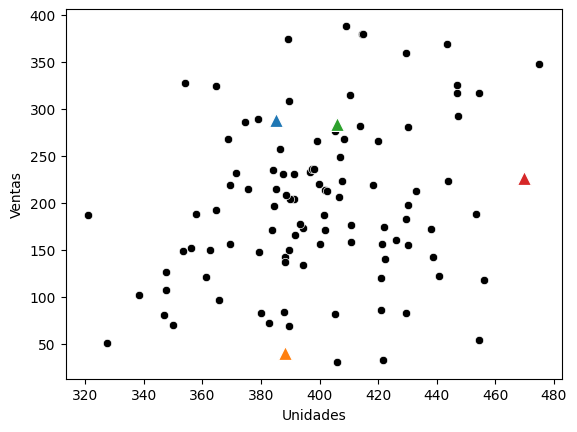

In [ ]:
info_sin_cluster = info_null(datos_sin_cluster, 4,
                             ['#9600FD', '#7FFF1B','#FF8645', "#FE0606" ]
                             )
plot_inicio(datos_sin_cluster, info_sin_cluster)

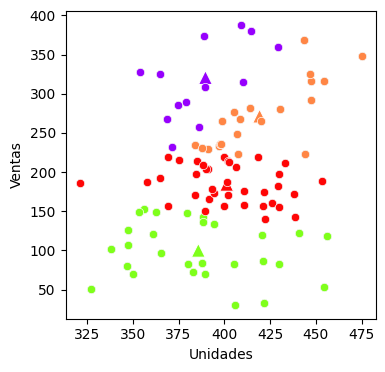

In [ ]:
info_clusters =plot_interaccion(datos_sin_cluster, info_clusters= info_sin_cluster,
                                show=[*list(range(10)), *list(range(20,30)),*list(range(90,100))] )